In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C


In [53]:
# Fonction 2D 
# def f(x, y):
#     return np.sin(x + y) 

def f(x,y):
    return np.sin(x*2*np.pi*y) + np.cos(np.pi*4*y)
# fonction erreur 
def erreur(y_true, y_pred):
    return np.sqrt((y_true - y_pred)**2)


In [54]:
N = 200
N_train = 20

# --------------------------
# Données d'entraînement
# --------------------------
X_train = np.linspace(0, 1, N_train)
Y_train = np.linspace(0, 1, N_train)

# Grille 2D
Xg_train, Yg_train = np.meshgrid(X_train, Y_train)

# Liste de points (N_train*N_train , 2)
XY_train = np.column_stack([Xg_train.ravel(), Yg_train.ravel()])

# Valeurs cibles (flatten)
Z_train = f(Xg_train, Yg_train).ravel()


# --------------------------
# Données pour la prédiction
# --------------------------
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

Xg, Yg = np.meshgrid(x, y)

XY = np.column_stack([Xg.ravel(), Yg.ravel()])

# Valeurs vraies (optionnel)
z = f(Xg, Yg).ravel()


In [55]:
from sklearn.gaussian_process.kernels import Matern

# processus gaussien ( kernel RBF)
kernel = Matern(length_scale=1.0, nu=1.5)

gp = GaussianProcessRegressor(n_restarts_optimizer=10, kernel = kernel)

# Entrainement
gp.fit(XY_train, Z_train)


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10)

In [56]:
y_pred, sigma = gp.predict(XY, return_std=True)
res = erreur(z, y_pred)
Y_pred = y_pred.reshape(N,N)
z = z.reshape(N,N)

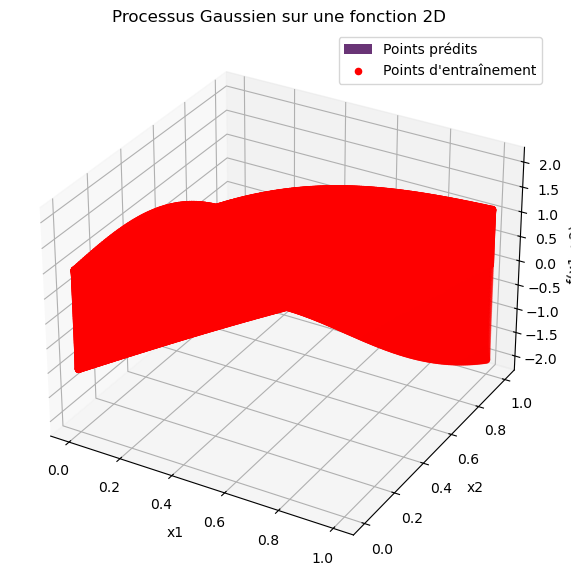

In [57]:
# visualisation 3D 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, Y_pred, cmap='viridis', alpha=0.8,label='Points prédits')
ax.scatter(x, y, z, c='r', marker='o', label='Points d\'entraînement')

ax.set_title("Processus Gaussien sur une fonction 2D")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
plt.show()

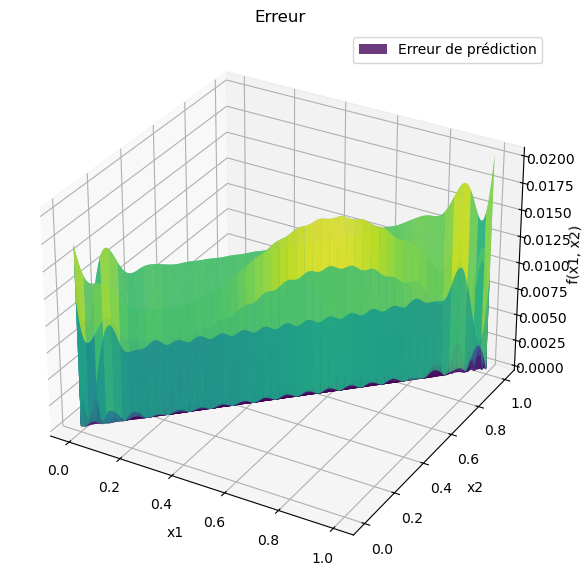

In [60]:
# visualisation 3D de l'erreur
res = res.reshape(N,N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, res, cmap='viridis', alpha=0.8,label='Erreur de prédiction')

ax.set_title("Erreur")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
plt.show()

In [59]:
# valeur de la mse
np.sum(res**2)/(N*N)

np.float64(1.3707943116526559e-05)